#Web Scraping do site da Alura

* Contexto: Precisava de uma tabela que tivesse todos os cursos da alura definidos em Categorias e Subcategorias. Quando pesquisei sobre a API de cursos da alura (https://www.alura.com.br/api/cursos) percebi que não havia essa divisão. Portanto decidi realizar um web scrapping para gerar essa tabela.
* Ambiente Utilizado: Google Collab.


In [1]:
#Importando bibliotecas necessárias
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen

## Obtendo o conteúdo da web:
* O site https://www.alura.com.br/cursos-online-programacao possuia justamente as informações que necessitava para a categoria Programação. Logo bastava realizar o mesmo processo para as outras categorias(Frontend, Data Science, DevOps, UX, Mobile e Inovação & Gestão).
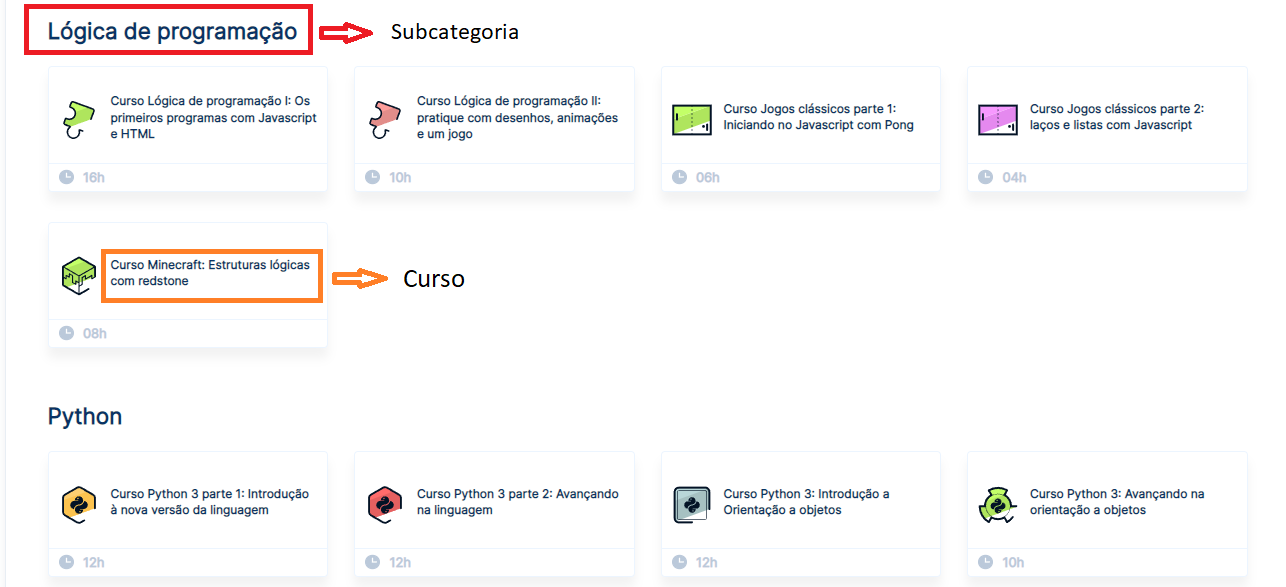

In [2]:
#Sites utilizados para obter as informações
url_programacao = 'https://www.alura.com.br/cursos-online-programacao'
url_frontend = 'https://www.alura.com.br/cursos-online-front-end'
url_datascience = 'https://www.alura.com.br/cursos-online-data-science'
url_devops = 'https://www.alura.com.br/cursos-online-devops'
url_uxdesign = 'https://www.alura.com.br/cursos-online-design-ux'
url_mobile = 'https://www.alura.com.br/cursos-online-mobile'
url_inovacaogestao = 'https://www.alura.com.br/cursos-online-inovacao-gestao'
#Realizando o request das categorias:
# Programacao
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_programacao = Request(url_programacao,headers = headers)
response_programacao = urlopen(req_programacao)
html_programacao = response_programacao.read()
# Frontend
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_frontend = Request(url_frontend,headers = headers)
response_frontend = urlopen(req_frontend)
html_frontend = response_frontend.read()
# Data Science
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_datascience = Request(url_datascience,headers = headers)
response_datascience = urlopen(req_datascience)
html_datascience = response_datascience.read()
# DevOps
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_devops = Request(url_devops,headers = headers)
response_devops = urlopen(req_devops)
html_devops = response_devops.read()
# UX Design
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_uxdesign = Request(url_uxdesign,headers = headers)
response_uxdesign = urlopen(req_uxdesign)
html_uxdesign = response_uxdesign.read()
# Mobile
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_mobile = Request(url_mobile,headers = headers)
response_mobile = urlopen(req_mobile)
html_mobile = response_mobile.read()
# Inovacao e Gestao
headers = {'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.131 Safari/537.36'}
req_inovacaogestao = Request(url_inovacaogestao,headers = headers)
response_inovacaogestao = urlopen(req_inovacaogestao)
html_inovacaogestao = response_inovacaogestao.read()

In [3]:
#Programacao
#Limpando o HTML e gerando o BeautifulSoup do mesmo:
html_programacao = html_programacao.decode('utf-8')
html_programacao = ' '.join(html_programacao.split()).replace('> <','><')
bs_programacao = BeautifulSoup(html_programacao,'html.parser')
#Gerando uma lista para Categoria, Subcategoria, Curso.
categoria_programacao, subcategoria_programacao, curso_programacao = [],[],[]
# Realizando a coleta das informações de cada curso.
for item in bs_programacao.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_programacao.append('Programação')
    subcategoria_programacao.append(item.getText())
    curso_programacao.append(tipo.getText())
#Gerando um Dataframe com as informações coletadas
df_programacao = pd.DataFrame({'Categoria' : categoria_programacao,
                               'Subcategoria' : subcategoria_programacao,
                               'Curso' : curso_programacao})

#O mesmo processo acima foi realizado para as outras categorias.
#Frontend
html_frontend = html_frontend.decode('utf-8')
html_frontend = ' '.join(html_frontend.split()).replace('> <','><')
bs_frontend = BeautifulSoup(html_frontend,'html.parser')
categoria_frontend, subcategoria_frontend, curso_frontend = [],[],[]
for item in bs_frontend.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_frontend.append('Frontend')
    subcategoria_frontend.append(item.getText())
    curso_frontend.append(tipo.getText())
df_frontend = pd.DataFrame({'Categoria' : categoria_frontend,
                               'Subcategoria' : subcategoria_frontend,
                               'Curso' : curso_frontend})
#Data Science
html_datascience = html_datascience.decode('utf-8')
html_datascience = ' '.join(html_datascience.split()).replace('> <','><')
bs_datascience = BeautifulSoup(html_datascience,'html.parser')
categoria_datascience, subcategoria_datascience, curso_datascience = [],[],[]
for item in bs_datascience.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_datascience.append('Data Science')
    subcategoria_datascience.append(item.getText())
    curso_datascience.append(tipo.getText())
df_datascience = pd.DataFrame({'Categoria' : categoria_datascience,
                               'Subcategoria' : subcategoria_datascience,
                               'Curso' : curso_datascience})
#Devops
html_devops = html_devops.decode('utf-8')
html_devops = ' '.join(html_devops.split()).replace('> <','><')
bs_devops = BeautifulSoup(html_devops,'html.parser')
categoria_devops, subcategoria_devops, curso_devops = [],[],[]
for item in bs_devops.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_devops.append('Devops')
    subcategoria_devops.append(item.getText())
    curso_devops.append(tipo.getText())
df_devops = pd.DataFrame({'Categoria' : categoria_devops,
                               'Subcategoria' : subcategoria_devops,
                               'Curso' : curso_devops})
#Uxdesign
html_uxdesign = html_uxdesign.decode('utf-8')
html_uxdesign = ' '.join(html_uxdesign.split()).replace('> <','><')
bs_uxdesign = BeautifulSoup(html_uxdesign,'html.parser')
categoria_uxdesign, subcategoria_uxdesign, curso_uxdesign = [],[],[]
for item in bs_uxdesign.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_uxdesign.append('UX & Design')
    subcategoria_uxdesign.append(item.getText())
    curso_uxdesign.append(tipo.getText())
df_uxdesign = pd.DataFrame({'Categoria' : categoria_uxdesign,
                               'Subcategoria' : subcategoria_uxdesign,
                               'Curso' : curso_uxdesign})
#Mobile
html_mobile = html_mobile.decode('utf-8')
html_mobile = ' '.join(html_mobile.split()).replace('> <','><')
bs_mobile = BeautifulSoup(html_mobile,'html.parser')
categoria_mobile, subcategoria_mobile, curso_mobile = [],[],[]
for item in bs_mobile.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_mobile.append('Mobile')
    subcategoria_mobile.append(item.getText())
    curso_mobile.append(tipo.getText())
df_mobile = pd.DataFrame({'Categoria' : categoria_mobile,
                               'Subcategoria' : subcategoria_mobile,
                               'Curso' : curso_mobile})
#Inovacao & Gestão
html_inovacaogestao = html_inovacaogestao.decode('utf-8')
html_inovacaogestao = ' '.join(html_inovacaogestao.split()).replace('> <','><')
bs_inovacaogestao = BeautifulSoup(html_inovacaogestao,'html.parser')
categoria_inovacaogestao, subcategoria_inovacaogestao, curso_inovacaogestao = [],[],[]
for item in bs_inovacaogestao.find("div", {"class" : "lista-subcategorias__subcategorias subcategoria__container"}).findChildren('h4'):
  for tipo in item.find_next_sibling('ul').findAll('span',{'class' : 'card-curso__nome'}):
    categoria_inovacaogestao.append('Inovação & Gestão')
    subcategoria_inovacaogestao.append(item.getText())
    curso_inovacaogestao.append(tipo.getText())
df_inovacaogestao = pd.DataFrame({'Categoria' : categoria_inovacaogestao,
                               'Subcategoria' : subcategoria_inovacaogestao,
                               'Curso' : curso_inovacaogestao})

## Gerando os Dataframes de cada categoria:

In [4]:
df_datascience.head()

,Categoria,Subcategoria,Curso
0,Data Science,SQL e Banco de Dados,Curso Introdução ao SQL com MySQL: Manipule e ...
1,Data Science,SQL e Banco de Dados,Curso Consultas SQL: Avançando no SQL com MySQL
2,Data Science,SQL e Banco de Dados,Curso Comandos DML: Manipulação de dados com M...
3,Data Science,SQL e Banco de Dados,Curso Procedures SQL: Executando código no MySQL
4,Data Science,SQL e Banco de Dados,Curso Administração do MySQL: Segurança e otim...


In [5]:
df_devops.head()

,Categoria,Subcategoria,Curso
0,Devops,Builds e Controle de versão,Curso Git e Github: Controle e compartilhe seu...
1,Devops,Builds e Controle de versão,Curso Git e Github: Estratégias de ramificação...
2,Devops,Builds e Controle de versão,Curso Maven: Gerenciamento de dependências e b...
3,Devops,Builds e Controle de versão,Curso Build de uma aplicação .NET: construindo...
4,Devops,Entrega Contínua,Curso Integração Contínua: Mais qualidade e me...


In [6]:
df_frontend.head()

,Categoria,Subcategoria,Curso
0,Frontend,HTML e CSS,Curso HTML5 e CSS3 parte 1: A primeira página ...
1,Frontend,HTML e CSS,"Curso HTML5 e CSS3 parte 2: Posicionamento, li..."
2,Frontend,HTML e CSS,Curso HTML5 e CSS3 parte 3: Trabalhando com fo...
3,Frontend,HTML e CSS,Curso HTML5 e CSS3 parte 4: Avançando no CSS
4,Frontend,HTML e CSS,Curso CSS Grid: Simplificando layouts


In [7]:
df_inovacaogestao.head()

,Categoria,Subcategoria,Curso
0,Inovação & Gestão,Métodos Ágeis,Curso Kanban parte 1: Fundamentos Essenciais
1,Inovação & Gestão,Métodos Ágeis,Curso Kanban parte 2: Métricas e Práticas Avan...
2,Inovação & Gestão,Métodos Ágeis,Curso Scrum: Agilidade em seu projeto
3,Inovação & Gestão,Métodos Ágeis,Curso Scrum parte 1: Gerencie o seu projeto de...
4,Inovação & Gestão,Métodos Ágeis,"Curso Scrum Parte 2: O Manifesto Ágil, Lideran..."


In [8]:
df_mobile.head()

,Categoria,Subcategoria,Curso
0,Mobile,React Native,Curso React Native: Começando do zero
1,Mobile,React Native,Curso React Native com Expo: Navegação com men...
2,Mobile,Flutter,Curso Fundamentos de Flutter: Crie o seu prime...
3,Mobile,Flutter,Curso Persistência com Flutter: Crie um app co...
4,Mobile,Flutter,Curso Flutter Nuvigator: Controle de rotas e n...


In [9]:
df_programacao.head()

,Categoria,Subcategoria,Curso
0,Programação,Lógica de programação,Curso Lógica de programação I: Os primeiros pr...
1,Programação,Lógica de programação,Curso Lógica de programação II: pratique com d...
2,Programação,Lógica de programação,Curso Jogos clássicos parte 1: Iniciando no Ja...
3,Programação,Lógica de programação,Curso Jogos clássicos parte 2: laços e listas ...
4,Programação,Lógica de programação,Curso Minecraft: Estruturas lógicas com redstone


In [10]:
df_uxdesign.head()

,Categoria,Subcategoria,Curso
0,UX & Design,UI - User Interface,Curso Adobe XD: Design visual de um site mobile
1,UX & Design,UI - User Interface,Curso Adobe XD: refinando o visual da interface
2,UX & Design,UI - User Interface,Curso Adobe XD: trabalhando com microinterações
3,UX & Design,UI - User Interface,Curso Adobe XD: Componentes da interface
4,UX & Design,UI - User Interface,Curso Sketch: Design visual de um site mobile


## Corrigindo Erros

* Erro 1: Alguns cursos da Alura foram atualizados e por isso não estão mais nas páginas da web. Eles são:
  * Data analysis: introdução a séries temporais e análises
  * Data Science: previsão com ARIMA
  * Power BI Desktop: Carregue, analise e visualize dados



In [11]:
#Erro 1
# Adicionando os cursos forçadamente
erro_1 = pd.DataFrame([["Data Science","Data Science","Curso Data analysis: introdução a séries temporais e análises"],
                       ["Data Science","Data Science","Curso Data Science: previsão com ARIMA"],
                       ["Data Science","Business Intelligence","Curso Power BI Desktop: Carregue, analise e visualize dados"]],
                      columns = ['Categoria','Subcategoria','Curso'])
df_datascience = df_datascience.append(erro_1,ignore_index=True)
df_datascience = df_datascience.sort_values('Subcategoria',ignore_index=True)
df_datascience.tail()

,Categoria,Subcategoria,Curso
180,Data Science,SQL e Banco de Dados,Curso SQL Server: Manipulação de dados com Mic...
181,Data Science,SQL e Banco de Dados,Curso SQL Server: Consultas avançadas com Micr...
182,Data Science,SQL e Banco de Dados,Curso SQL Server: Introdução ao SQL com Micros...
183,Data Science,SQL e Banco de Dados,Curso Introdução ao SQL com Oracle: Manipule e...
184,Data Science,SQL e Banco de Dados,Curso Introdução ao SQL com MySQL: Manipule e ...


In [17]:
df_datascience.loc[df_datascience['Curso'].isin(erro_1['Curso'])]

,Categoria,Subcategoria,Curso
0,Data Science,Business Intelligence,"Curso Power BI Desktop: Carregue, analise e vi..."
37,Data Science,Data Science,Curso Data Science: previsão com ARIMA
53,Data Science,Data Science,Curso Data analysis: introdução a séries tempo...


## Concatenando todos os Dataframes em um só e então exportando o mesmo

In [18]:
df_final = pd.concat([df_datascience,df_devops,df_frontend,df_inovacaogestao,
           df_mobile,df_programacao,df_uxdesign], ignore_index=True)
df_final.head()

,Categoria,Subcategoria,Curso
0,Data Science,Business Intelligence,"Curso Power BI Desktop: Carregue, analise e vi..."
1,Data Science,Business Intelligence,Curso Power BI Desktop: Construindo meu primei...
2,Data Science,Business Intelligence,Curso Power BI: Explorando recursos visuais
3,Data Science,Business Intelligence,Curso Power BI: Entendendo as fórmulas DAX
4,Data Science,Business Intelligence,Curso Dashboard com Power BI: Construindo rela...


In [19]:
df_final.to_csv('dataset_Alura.csv',sep=';',index=False,encoding='utf-8-sig')